# Read Source and Downloads Images 

In [75]:
import pandas as pd 

data = pd.read_csv("../data/neckline_two_variants_based_6.csv", names=['order', 'img_url', 'class']).sample(frac=1).reset_index(drop=True)
data.head() 

,order,img_url,class
0,1,https://showroom.aydinli.com.tr/2021K/02/50240...,BISIKLET YAKA
1,1,https://resim.aydinli.com.tr/08/1/0TK/S5023696...,V - YAKA
2,1,https://resim.aydinli.com.tr/08/1/011/S5020002...,POLO YAKA
3,1,https://showroom.aydinli.com.tr/2023Y/08/50263...,BISIKLET YAKA
4,1,https://resim.aydinli.com.tr/02/1/011/S5024982...,POLO YAKA


In [76]:
data.shape 

(33044, 3)

In [77]:
data['class'].value_counts().values

array([9668, 9486, 5790, 3015, 2796, 2289], dtype=int64)

In [78]:
import matplotlib.pyplot as plt
import seaborn

def create_pi(data, keys):  
    palette_color = seaborn.color_palette('bright')
    plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')

    plt.show()

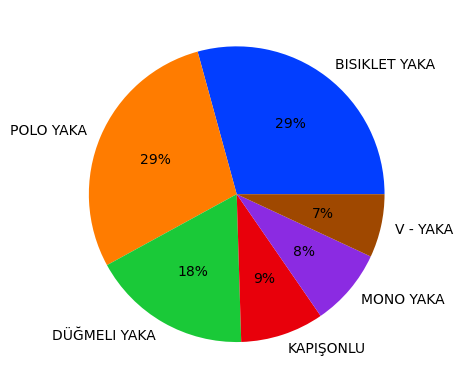

In [79]:
create_pi(data['class'].value_counts().values, data['class'].value_counts().index.to_list())

In [80]:
def create_bar(keys, values):  
    fig = plt.figure(figsize = (10, 5))
    plt.bar(keys, values, color ='maroon',
            width = 0.4)
    plt.show()

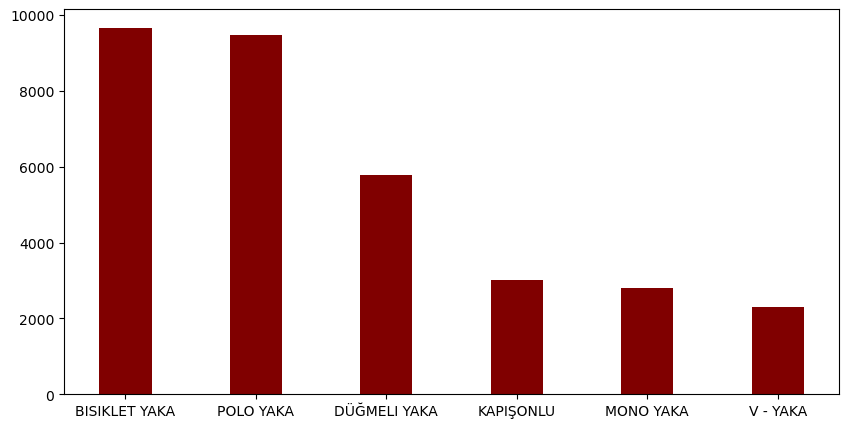

In [81]:
create_bar(data['class'].value_counts().index.to_list(), data['class'].value_counts().values)

# Data Preparation 

## 1. Min Balanced Dataset

In [82]:
data['class'].value_counts() 

BISIKLET YAKA    9668
POLO YAKA        9486
DÜĞMELI YAKA     5790
KAPIŞONLU        3015
MONO YAKA        2796
V - YAKA         2289
Name: class, dtype: int64

In [83]:
data[data['class'] == "V - YAKA"].sample(frac=1).iloc[:2250, :] 

,order,img_url,class
6008,3,https://showroom.aydinli.com.tr/2021K/02/50237...,V - YAKA
5112,2,https://showroom.aydinli.com.tr/2023K/08/50270...,V - YAKA
15318,1,https://resim.aydinli.com.tr/08/3/0TK/S5022469...,V - YAKA
12222,1,https://resim.aydinli.com.tr/08/2/0TK/S5023708...,V - YAKA
12823,3,https://resim.aydinli.com.tr/08/1/011/S5019979...,V - YAKA
...,...,...,...
12663,1,https://resim.aydinli.com.tr/02/1/0TK/S5022921...,V - YAKA
31867,2,https://resim.aydinli.com.tr/02/2/032/S5020285...,V - YAKA
9232,2,https://resim.aydinli.com.tr/05/1/011/S5020249...,V - YAKA
32466,3,https://resim.aydinli.com.tr/08/3/0TK/S5022469...,V - YAKA


In [84]:
data_min_balanced_df = pd.DataFrame() 

for c in data['class'].value_counts().index:
    data_min_balanced_df = pd.concat([
        data_min_balanced_df,
        data[data['class'] == c].sample(frac=1, random_state=42).iloc[:2250, :] 
    ])

data_min_balanced_df.shape 

(13500, 3)

In [85]:
data_min_balanced_df["class"].value_counts() 

BISIKLET YAKA    2250
POLO YAKA        2250
DÜĞMELI YAKA     2250
KAPIŞONLU        2250
MONO YAKA        2250
V - YAKA         2250
Name: class, dtype: int64

In [86]:
train_df = pd.DataFrame() 
test_df = pd.DataFrame() 

for c in data_min_balanced_df['class'].value_counts().index:
    test_df = pd.concat([
        test_df,
        data_min_balanced_df[data_min_balanced_df['class'] == c].sample(frac=1, random_state=42).iloc[:250, :] 
    ])

    train_df = pd.concat([
        train_df,
        data_min_balanced_df[data_min_balanced_df['class'] == c].sample(frac=1, random_state=42).iloc[250:, :] 
    ])

train_df.shape, test_df.shape   

((12000, 3), (1500, 3))

In [87]:
train_df["partition"] = "train" 
test_df["partition"] = "test" 

data_min_balanced_df = pd.concat([
    train_df,
    test_df
]).reset_index(drop=True)

data_min_balanced_df.head() 

,order,img_url,class,partition
0,2,https://resim.aydinli.com.tr/08/1/011/S5023540...,BISIKLET YAKA,train
1,2,https://resim.aydinli.com.tr/08/1/0TK/S5022387...,BISIKLET YAKA,train
2,2,https://showroom.aydinli.com.tr/2023Y/08/50263...,BISIKLET YAKA,train
3,2,https://resim.aydinli.com.tr/08/2/082/S5025647...,BISIKLET YAKA,train
4,1,https://showroom.aydinli.com.tr/2023Y/08/50265...,BISIKLET YAKA,train


In [88]:
i = 0 
labels = dict() 
for idx in data_min_balanced_df["class"].value_counts().index:
    data_min_balanced_df.loc[data_min_balanced_df["class"] == idx, 'class'] = i 
    labels[idx] = i 
    i = i + 1 

labels

{'BISIKLET YAKA': 0,
 'POLO YAKA': 1,
 'DÜĞMELI YAKA': 2,
 'KAPIŞONLU': 3,
 'MONO YAKA': 4,
 'V - YAKA': 5}

In [89]:
data_min_balanced_df.head() 

,order,img_url,class,partition
0,2,https://resim.aydinli.com.tr/08/1/011/S5023540...,0,train
1,2,https://resim.aydinli.com.tr/08/1/0TK/S5022387...,0,train
2,2,https://showroom.aydinli.com.tr/2023Y/08/50263...,0,train
3,2,https://resim.aydinli.com.tr/08/2/082/S5025647...,0,train
4,1,https://showroom.aydinli.com.tr/2023Y/08/50265...,0,train


### Download Data 

In [90]:
import requests

def save_image(image_url, path):
    img_data = requests.get(image_url).content
    with open(path, 'wb') as handler:
        handler.write(img_data)

In [104]:
import numpy as np
import cv2
import requests

def save_image_cv(url, scale_percent, path, size = None):
    resp = requests.get(url, stream=True).raw 
    
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    if image is None: 
        raise TypeError("None type") 
    
    if size == None: 
        width = int(image.shape[1] * scale_percent / 100)
        height = int(image.shape[0] * scale_percent / 100)
        dsize = (width, height)
    else: 
        dsize = size 
    
    output = cv2.resize(image, dsize)

    cv2.imwrite(path, output)

In [106]:
import os

def make_dataset_cv(dataset_name, datasource, iteration = None):
    problems_of_idx = []
    iterator = 0 
    try:
        base = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), '.'))
        path = os.path.join('data', dataset_name)
        path = os.path.join(base, path)
        if not os.path.isdir(path):
            os.mkdir(path)
        
        # ../data/dataset_name/
        
        folder_train = os.path.join(path, "train") 
        os.mkdir(folder_train) 
        
        folder_test = os.path.join(path, "test") 
        os.mkdir(folder_test) 

        for img_index, img_row in datasource.iterrows():
                try:
                    tmp = os.path.join(path, img_row["partition"])
                    # data / dataset / train - test / 
                    tmp = os.path.join(tmp, "class_" + str(img_row["class"])) 
                    if not os.path.isdir(tmp): 
                        os.mkdir(tmp) 
                    
                    save_image_cv(img_row['img_url'], 75, os.path.join(tmp, str(img_index) + '.png'), size=(224, 224))
                    if iteration is not None and iterator == iteration:
                        break
                    else:
                        iterator+=1
                        if iterator % 1000 == 0: 
                            print(f"Iteration {iterator}") 
                            
                except Exception as e2:
                    problems_of_idx.append(img_index)
                    print(e2)
                    continue
    except Exception as e:
        print('An exception occurred.', e)
    return problems_of_idx

In [107]:
errors = make_dataset_cv(
    "data_min_balanced_df", 
    data_min_balanced_df, 
)

Iteration 1000
None type
None type
Iteration 2000
None type
None type
('Connection aborted.', TimeoutError(10060, 'A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond', None, 10060, None))
Iteration 3000
Iteration 4000
None type
None type
None type
None type
Iteration 5000
Iteration 6000
None type
Iteration 7000
None type
Iteration 8000
None type
Iteration 9000
Iteration 10000
None type
Iteration 11000
Iteration 12000
Iteration 13000
